In [128]:
import pandas as pd
import numpy as np

In [129]:
df = pd.read_csv('../data/USA/LC/X_train.csv.gz')
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,hardship_flag
0,14400.0,60 months,12.49,323.90,B,7 years,MORTGAGE,40000.0,Not Verified,debt_consolidation,...,16.08,0.0,770.0,0.0,13.0,0.0,7771.0,13.8,30.0,N
1,9600.0,36 months,13.99,328.06,C,6 years,RENT,60000.0,Verified,debt_consolidation,...,16.54,0.0,675.0,1.0,12.0,0.0,10965.0,87.7,31.0,N
2,11500.0,60 months,15.61,277.29,C,10+ years,RENT,34000.0,Source Verified,debt_consolidation,...,17.08,0.0,685.0,0.0,7.0,0.0,9321.0,48.8,8.0,N
3,10000.0,36 months,11.49,329.72,B,10+ years,MORTGAGE,49000.0,Source Verified,credit_card,...,13.92,1.0,680.0,1.0,9.0,0.0,5984.0,48.3,34.0,N
4,3500.0,36 months,19.03,128.35,D,10+ years,MORTGAGE,40000.0,Source Verified,debt_consolidation,...,24.33,0.0,660.0,0.0,7.0,1.0,9254.0,54.1,16.0,N


In [130]:
X = df[[x for x in df.columns if x != 'fico_range_low']]
y= df.fico_range_low

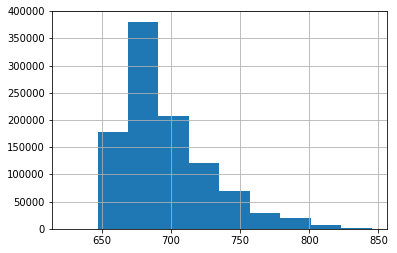

In [131]:
y.hist()

In [132]:
from sklearn.preprocessing import MinMaxScaler
yscaler = MinMaxScaler()
ys = yscaler.fit_transform(y.values.reshape(-1,1)).reshape(1,-1)[0]

Text(0, 0.5, 'Frequency')

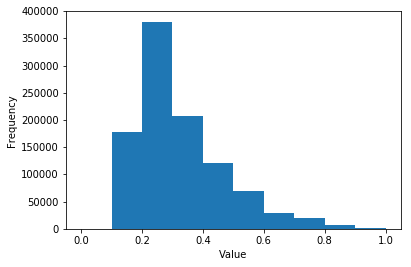

In [133]:
import matplotlib.pyplot as plt
plt.hist(ys)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [134]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'hardship_flag'],
      dtype='object')

In [137]:
fico_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

fico_vars: variables related to the person not to the characteristics of the loan

In [138]:
from transformers import ColumnSelectTransformer, EncoderTransformer
cst = ColumnSelectTransformer(fico_vars)
sce = EncoderTransformer()
X2 = cst.fit_transform(df)
X4 = sce.fit_transform(X2)
X4['y'] = ys
corr = X4.corr()
corr.y

annual_inc                             0.072834
dti                                   -0.071336
delinq_2yrs                           -0.176356
inq_last_6mths                        -0.085164
open_acc                               0.014420
pub_rec                               -0.187523
revol_bal                              0.024489
total_acc                              0.022071
emp_length_1 year                     -0.011408
emp_length_10+ years                   0.019903
emp_length_2 years                    -0.008397
emp_length_3 years                    -0.008303
emp_length_4 years                    -0.004381
emp_length_5 years                    -0.002199
emp_length_6 years                    -0.001806
emp_length_7 years                    -0.002848
emp_length_8 years                     0.000421
emp_length_9 years                     0.001257
emp_length_< 1 year                    0.001743
home_ownership_ANY                     0.003008
home_ownership_MORTGAGE                0

## Correlation Analysis

**annual_inc**:  0.072834, correct, as income increases we expect a higher fico score <br>
<br>
**dti**:  -0.071336, correct, high debt to income translates in lower fico score <br>
<br>
**delinq_2yrs**:  -0.176356, correct, delinquency in the last two years translates in lower ficto scores <br>
<br>
**inq_last_6mths**:   -0.085164, correct, inquires decrease fico score, LC explains it: <br>
<br>
When you apply for a credit card, mortgage, loan, or other credit, a hard credit inquiry appears on your credit report. One hard inquiry usually has little impact on your credit score, often a decrease of 1–5 points. Multiple inquiries can add up and have a larger impact.<br>
<br>
**open_acc**:  0.014420, correct, if you have an account open your fico score must increase  <br>      
<br>
**pub_rec**:  -0.187523, correct, Number of derogatory public records, decrease fico <br>
<br>
**revol_bal**:  0.024489, so so , there is a positive correlation between having previous credits to your fico score, its low, not that straightforward <br>
<br>
**total_acc**: 0.022071, correct, as more credit lines the borrower has, higher fico score <br>
<br>

**verification_status**: We can see that credits that are not verified have higher fico scores, more verification, tends to decrease fico: <br>
<br>
verification_status_Not Verified:         0.148856<br>
<br>
verification_status_Source Verified:     -0.080331<br>
verification_status_Verified:            -0.064609<br>
<br>
This can be understood by LC explanation: <br>
<br>
Checking a borrower's income or income source may reduce risk in certain circumstances, such as screening for exaggerated income on an application. On the other hand, when an initial loan application passes our robust screening models, we generally deem the applicant to be less risky and therefore don’t always need to verify their income.<br>


**home_ownership**: We can see a correct behavior, borrowers who own property have higher fico score, borrowers without property or who rent have lower fico:<br>
<br>
home_ownership_OWN:                      0.016175<br>
home_ownership_ANY:                      0.003008<br>
home_ownership_MORTGAGE:                 0.098901<br>
home_ownership_OTHER:                    0.003572<br>
<br>
<br>
home_ownership_NONE:                    -0.000969<br>
home_ownership_RENT:                    -0.111059<br>
<br>

**emp_length**: <br>


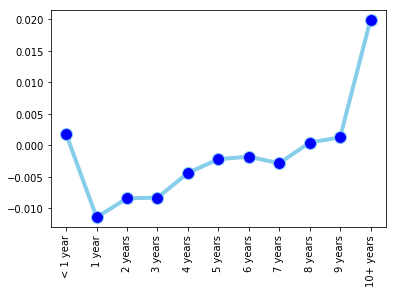

In [28]:
import matplotlib.pyplot as plt
c = np.array([0.001743, -0.011408, -0.008397, -0.008303,  -0.004381,
              -0.002199,-0.001806, -0.002848,0.000421,0.001257,0.019903])

labels = ['< 1 year',  '1 year', '2 years','3 years','4 years',
    '5 years', '6 years','7 years','8 years','9 years',
'10+ years']

plt.plot(c, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.show()

generally as employment length increases, fico score increases

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45, shuffle=True)

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer, EncoderTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


fico_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

cst = ColumnSelectTransformer(fico_vars)
sce = EncoderTransformer()
sc = MinMaxScaler()
clf = Ridge(alpha=3, max_iter=3000)

pipe_rdg = Pipeline([('colsel', cst), ('sce', sce), ('scaler', sc), ('lasso', clf)])

In [116]:
pipe_rdg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'])), ('sce', EncoderTransformer()), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lasso', Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [117]:
y_pred = pipe_rdg.predict(X_test)

In [118]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.74765065136864

0.0001 : 29.749235540985673 <br>
0.0005 : 29.74923474152018 <br>
0.001  : 29.74923374244403 <br>
0.002  : 29.749231745144055 <br>
0.003  : 29.749229748980373 <br>
0.005  : 29.74922576006117 <br>
0.01   : 29.749215807635945 <br>
0.05   : 29.749137207792266 <br>
0.1    : 29.74904149445099 <br>
0.5    : 29.748374732589085 <br>
1      : 29.74777693785163 <br>
2      : 29.747294691319702 <br>
3      : 29.74765065136864 <br>
5      : 29.750421234279326 <br>

In [120]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer, EncoderTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


fico_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

cst = ColumnSelectTransformer(fico_vars)
sce = EncoderTransformer()
sc = MinMaxScaler()
clf = Ridge(alpha=2, max_iter=3000)

pipe_fico = Pipeline([('colsel', cst), ('sce', sce), ('scaler', sc), ('Ridge', clf)])

In [121]:
pipe_fico.fit(X, y)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'])), ('sce', EncoderTransformer()), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Ridge', Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [123]:
import joblib
joblib.dump(pipe_fico, '../data/USA/LC/fico_model.pkl')

['../data/USA/LC/fico_model.pkl']

In [124]:
import joblib
#from transformers import ColumnSelectTransformer

pipe_fico = joblib.load('../data/USA/LC/fico_model.pkl')

In [125]:
y_pred = pipe_fico.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.744962928266546